In [41]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

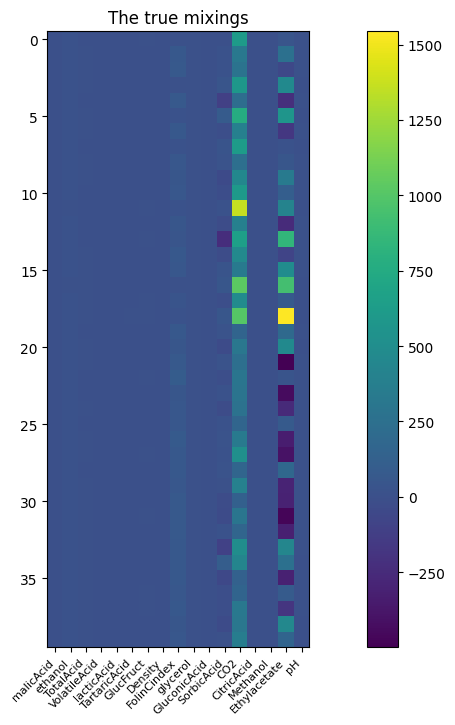

In [71]:
mat = scipy.io.loadmat('helpers/data/NMR_40wines.mat')
#Get X and Labels. Probably different for the other dataset, but i didn't check :)
X = mat.get('X')
Y = mat.get('Y')
#ppm is the scale of the x-axis.
ppm = mat.get('Label')

labels = mat.get('Label')
#40 wines times 8712 length spectrum
N, M = X.shape
#try to uncover mixings
label = [x[0] for x in labels[0]]

plt.figure(figsize=(15,8))
plt.imshow(Y)
plt.colorbar()
plt.title("The true mixings")

# Add xticks on the middle of the group bars
plt.xticks(range(len(label)), label, rotation=45,ha="right")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()





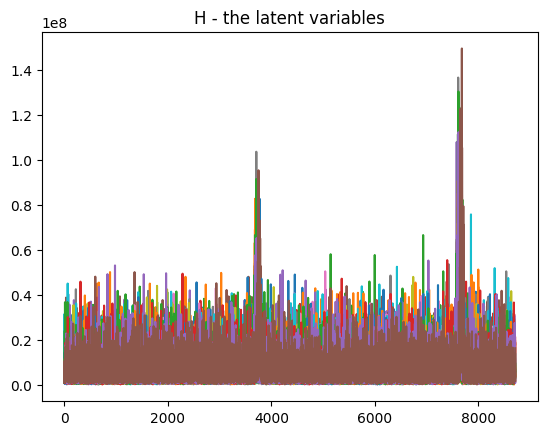

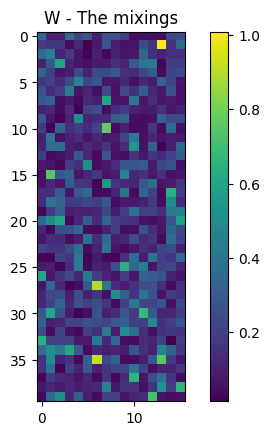

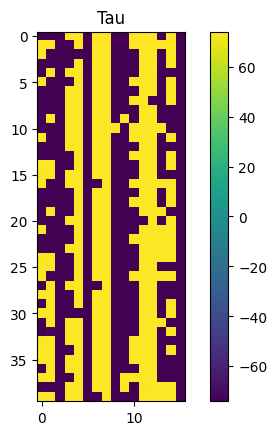

In [26]:
import scipy.io
import numpy as np
import pandas as pd
from shiftNMFDiscTau import ShiftNMF

alpha = 1e-5
nmf = ShiftNMF(X, 16, lr=0.1, alpha = alpha, factor=1, patience=10)
W, H, tau = nmf.fit(verbose=True, max_iter=250)

plt.figure()
for signal in H:
    plt.plot(signal)
plt.title("H - the latent variables")
plt.show()


plt.figure()
plt.imshow(W)
plt.colorbar()
plt.title("W - The mixings")
plt.show()

plt.figure()
plt.imshow(tau)
plt.colorbar()
plt.title("Tau")
plt.show()